# Importing necessary libraries



In [5]:
import requests
import dotenv
import os
import base64
from PIL import Image
from io import BytesIO
import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dotenv.load_dotenv()

True

# Setting up the API URL and headers


In [2]:
dotenv.load_dotenv()
token = os.getenv("HUGGING_FACE_API")

API_URL = "https://api-inference.huggingface.co/models/black-forest-labs/FLUX.1-dev"
headers = {"Authorization": f"Bearer {token}"}

# Image Generation


In [3]:
def query(payload):
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.content

def generate_image(prompt , output_path):
    image_bytes = query({
        "inputs": prompt,
    })

    image = Image.open(io.BytesIO(image_bytes))
    image.save(output_path)

    print(f"Image saved as {output_path}")




# Output the image


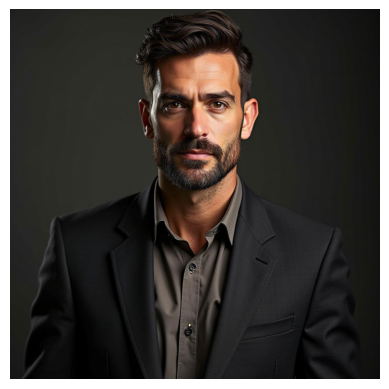

In [6]:
generate_image("A MAN ", "image.png")

img = mpimg.imread('image.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


# Mask Generation

In [7]:

API_URL = "https://api-inference.huggingface.co/models/mattmdjaga/segformer_b2_clothes"
headers = {"Authorization": f"Bearer {os.getenv('HUGGING_FACE_API')}"}

def query(filename):
    with open(filename, "rb") as f:
        data = f.read()
    response = requests.post(API_URL, headers=headers, data=data)
    return response.json()

def save_mask(mask_data, output_filename):
    mask_bytes = base64.b64decode(mask_data)
    mask_image = Image.open(BytesIO(mask_bytes))
    mask_image.save(output_filename)


# Output Mask

Mask saved for Background


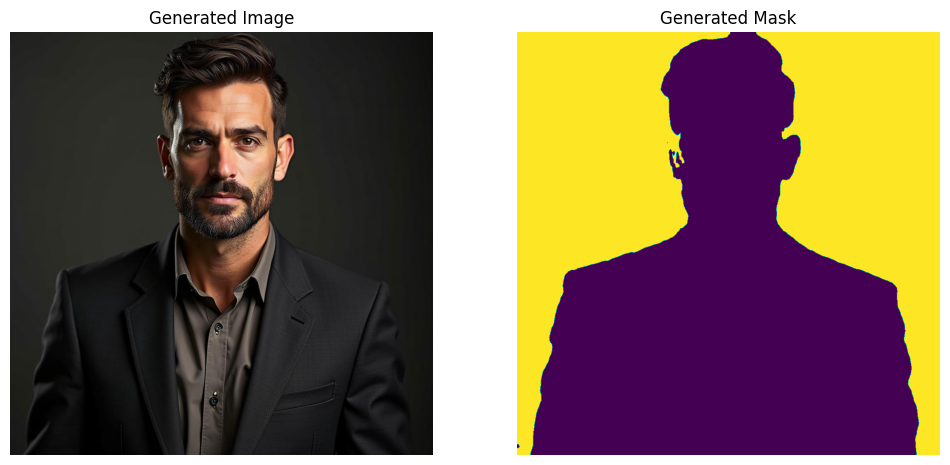

In [8]:
output = query("image.png")

for item in output:
    if item['label'] == 'Background':
        save_mask(item['mask'], f"mask.png")

print("Mask saved for Background")

# Load the generated image and mask
image = Image.open("image.png")
mask = Image.open("mask.png")

# Create a new figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the image
axes[0].imshow(image)
axes[0].set_title("Generated Image")
axes[0].axis('off')  # Hide the axis

# Display the mask
axes[1].imshow(mask)
axes[1].set_title("Generated Mask")
axes[1].axis('off')  # Hide the axis

# Show the figure
plt.show()


# Inpainting

In [9]:
print("Inpainting")

Inpainting
